# Extensive Example

In [1]:
import piscola

print(f'PISCOLA version: v{piscola.__version__}')

PISCOLA version: v2.0.0rc3


In this example, we will use a different SN. We will use SN 2008gp, a well-sampled low-*z* SN observed by the Carnegie Supernova Project (CSP).

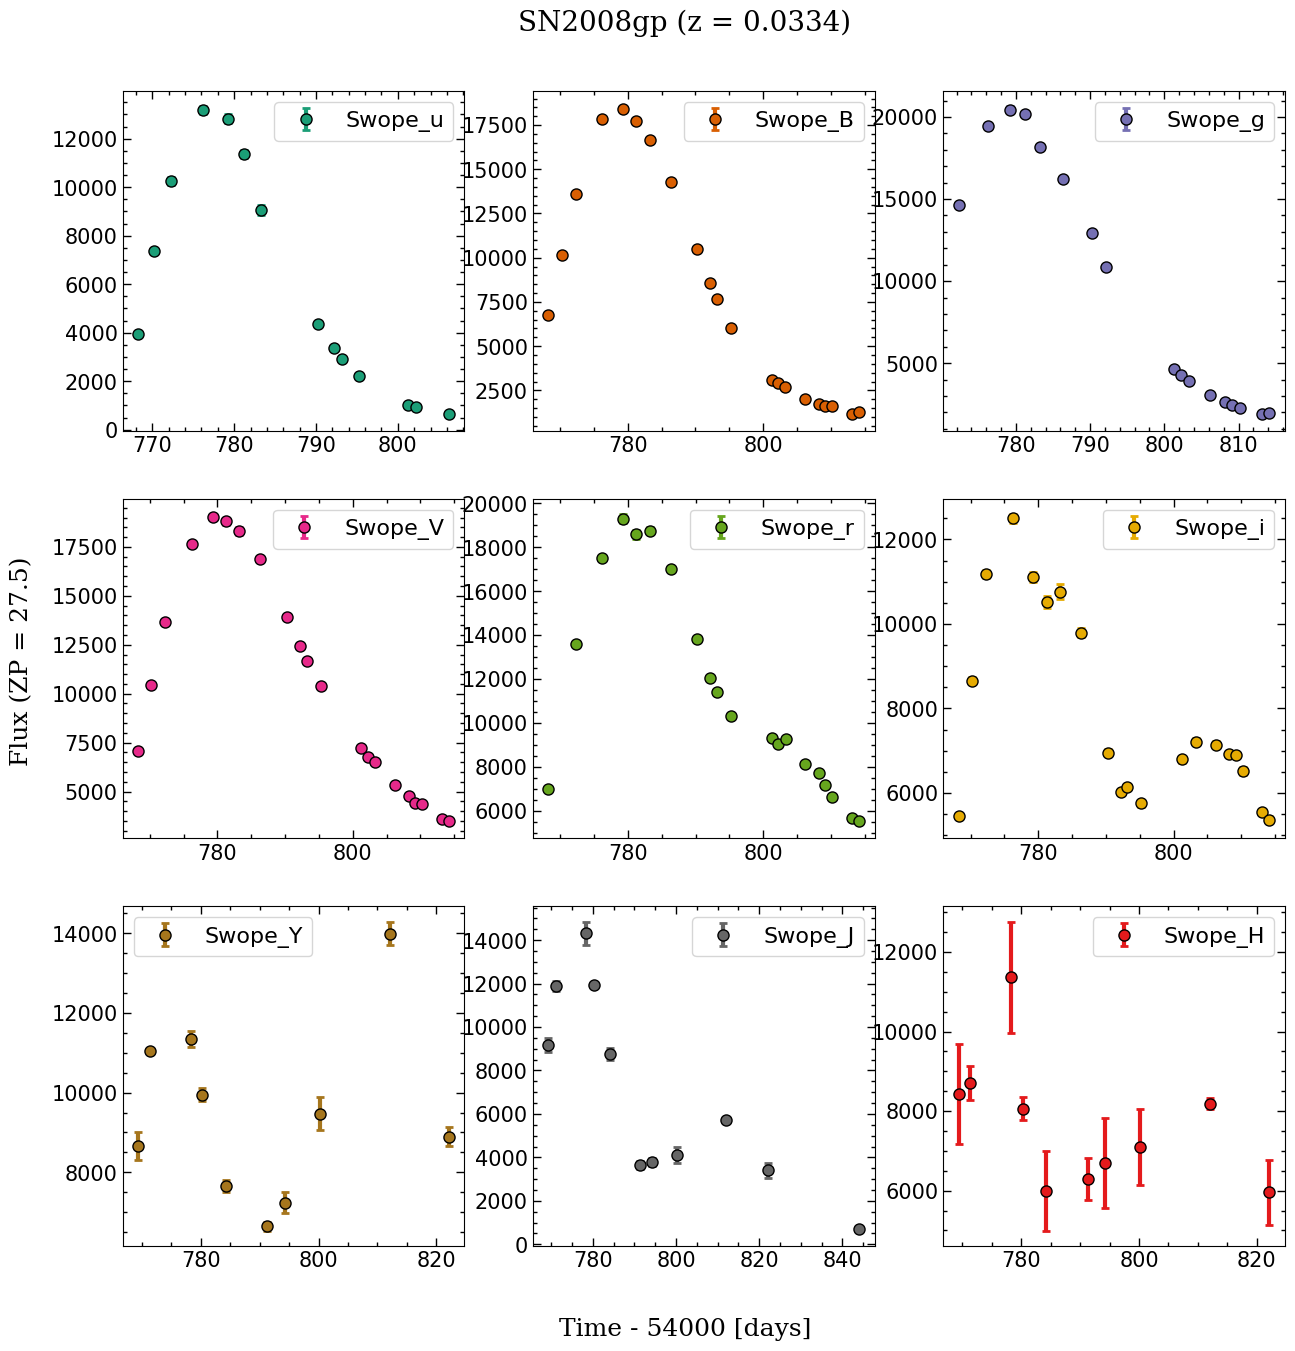

In [2]:
sn = piscola.call_sn('../../data/SN2008gp.dat')
sn.plot_lcs()

PISCOLA gives the option of simply fitting the light curves with Gaussian Process using the `sn.fit_lcs()` functions. This estimates the optical (*B*-band) peak. This information is then used to position the SED template for accurate *K*-correction when using `sn.fit()`.

<div class="alert alert-block alert-warning">
<b>Warning:</b> the sn.fit() function already calls sn.fit_lcs() internally.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> use the sn.fit_lcs() if you don't want to assume any light-curve information (fully data-driven approach). In principle, this can be used with any transient.
</div>

In [3]:
sn.fit_lcs()

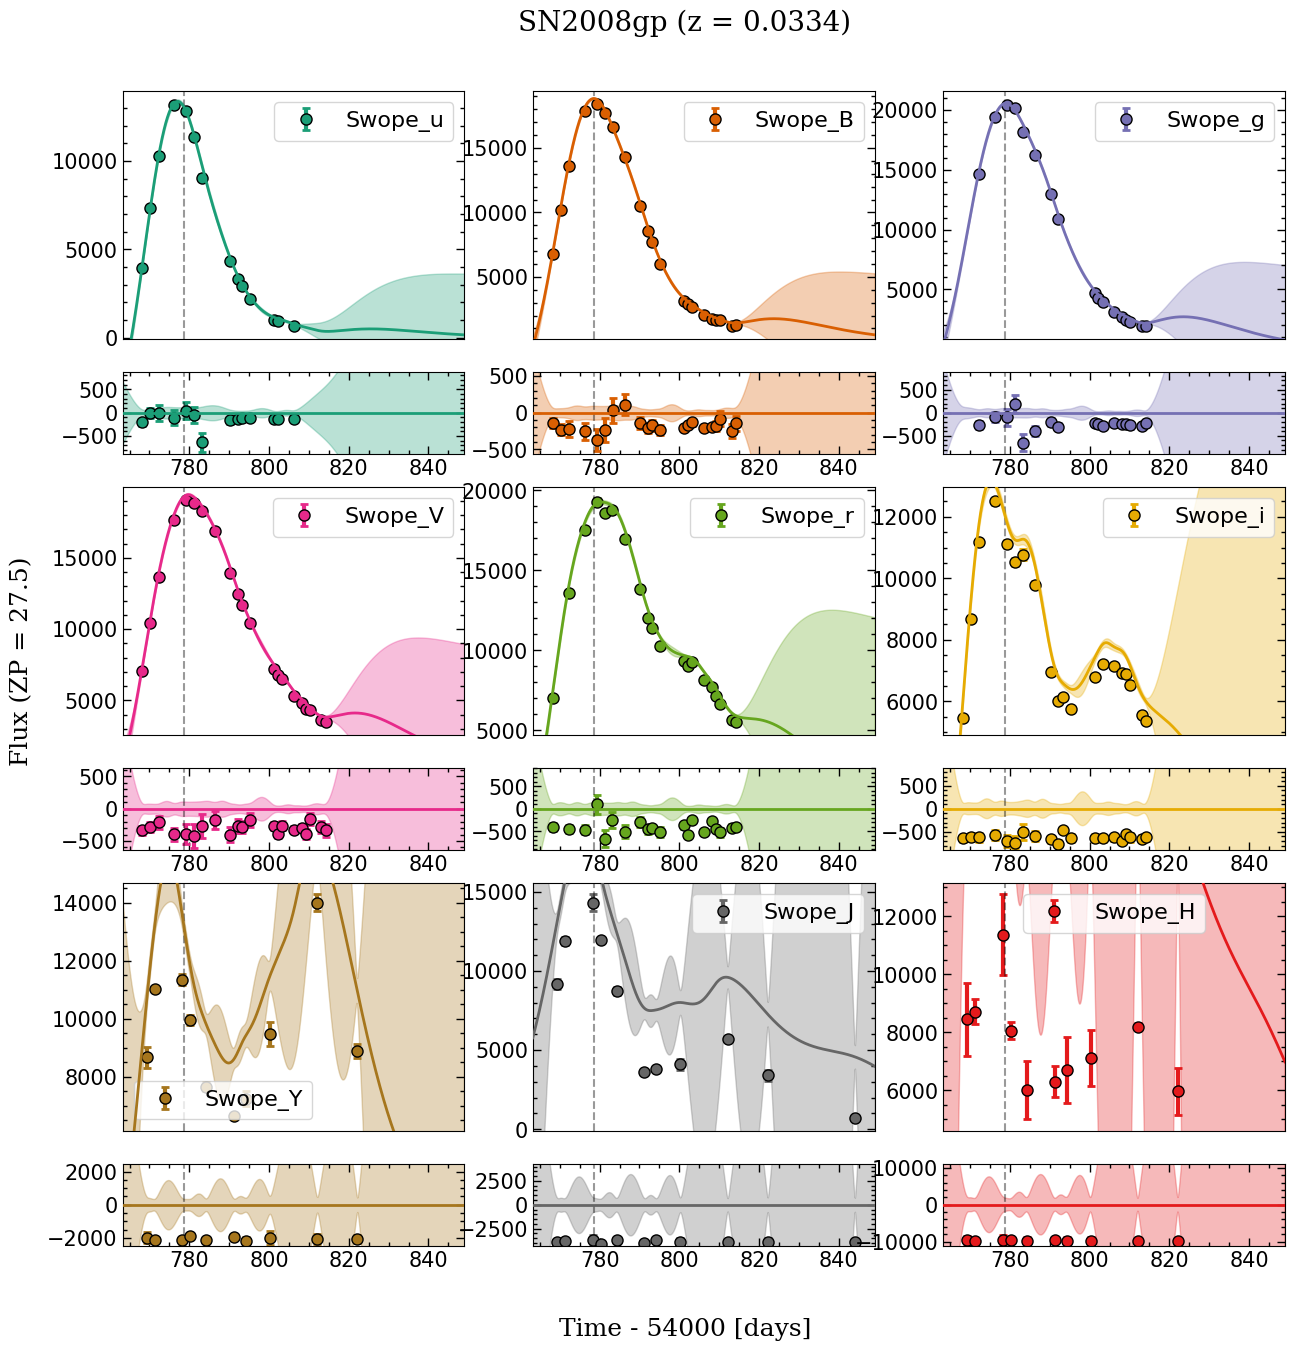

In [4]:
sn.plot_fits()

In this case, we see that PISCOLA does a good job fititng the optical light curves, but not so well with the near-infrared (NIR) light curves (*YJH*) due to the large scale difference in flux. If the aim is to fit with an SED template, this is fine as we only need the time of optical (*B*-band) peak (`sn.init_tmax`; vertical dashed line in the plot above) to adjust the phase of the template.

In [5]:
sn.init_tmax

54778.715

We can now use `sn.fit()` with the argument `skip_lcs_fit=True` so PISCOLA doesn't waste time doing the initial fit again.

In [6]:
sn.fit(skip_lcs_fit=True)

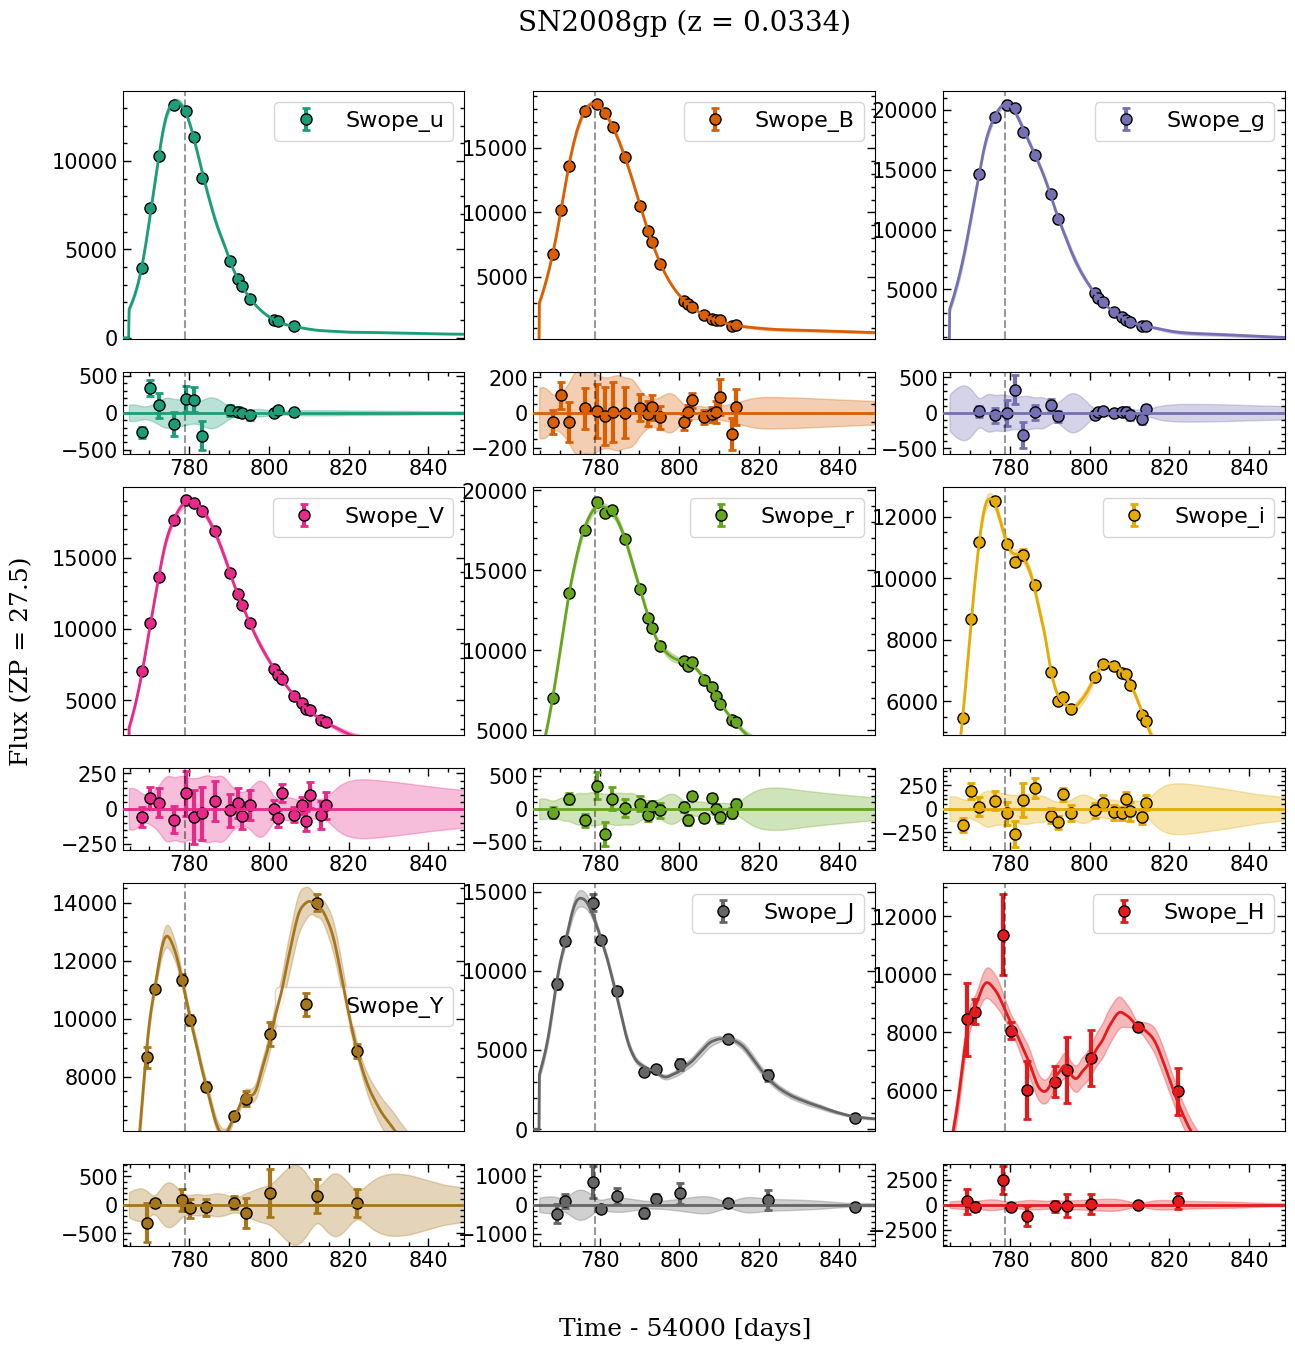

In [7]:
sn.plot_fits()

In [8]:
sn.lc_parameters

{'tmax': 54778.8,
 'tmax_err': 1.024,
 'Bmax': 16.509,
 'Bmax_err': 0.071,
 'dm15': 1.0,
 'dm15_err': 0.092,
 'colour': -0.051,
 'colour_err': 0.105}

The fit looks much better than the previous one.

## GP fit - no SED template

If the user just wants to use the initial Gaussian Process fit to the multi-colour light curves, there are a few ways in which this fit can be improved.

Apart from playing around with the parameters of `sn.fit_lcs()`, one can fit the optical and NIR light curves independenly. This is not ideal, but is a workaround:

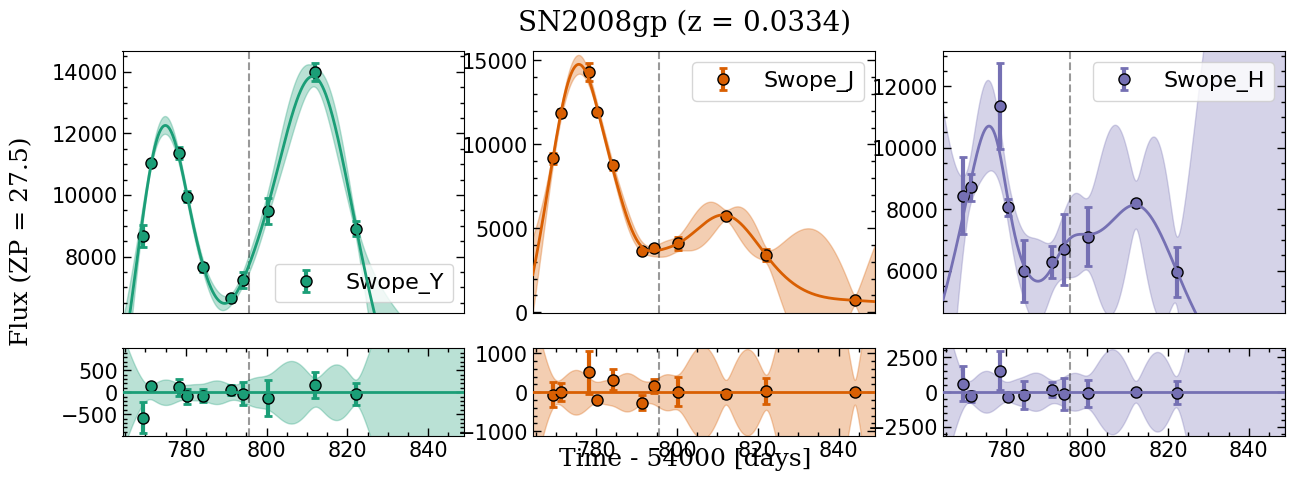

In [9]:
sn = piscola.call_sn('../../data/SN2008gp.dat')

sn.fit_lcs(sn.bands[-3:])
sn.plot_fits()

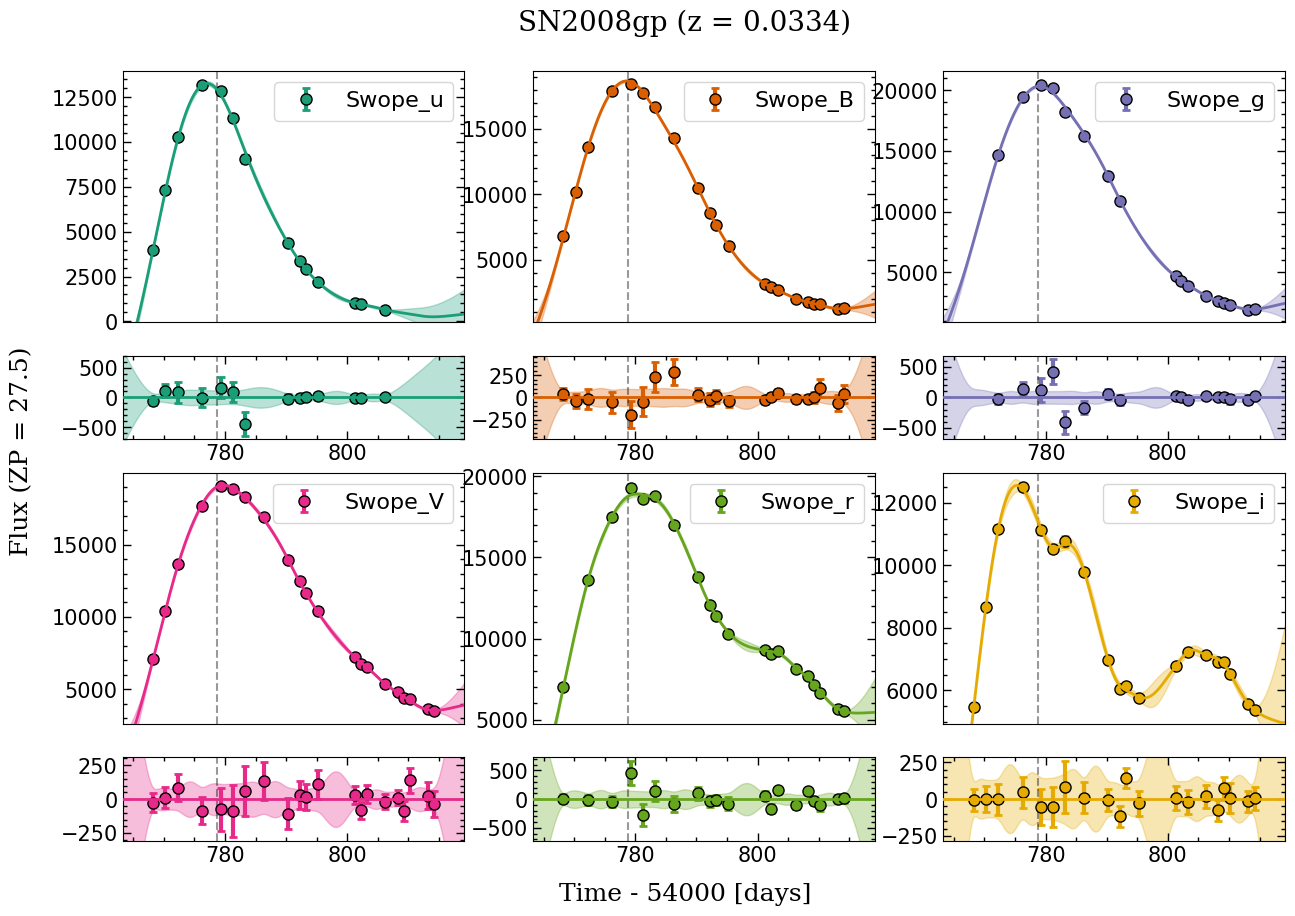

In [10]:
sn.fit_lcs(sn.bands[:6])
sn.plot_fits()

Note that the NIR is fitted first as `sn.fit_lcs()` replaces `sn.init_tmax` with the lattest fit.

Another option is to fit the light curves in logarithmic space, which solves the issues caused by the difference in scale between optical and NIR light curves

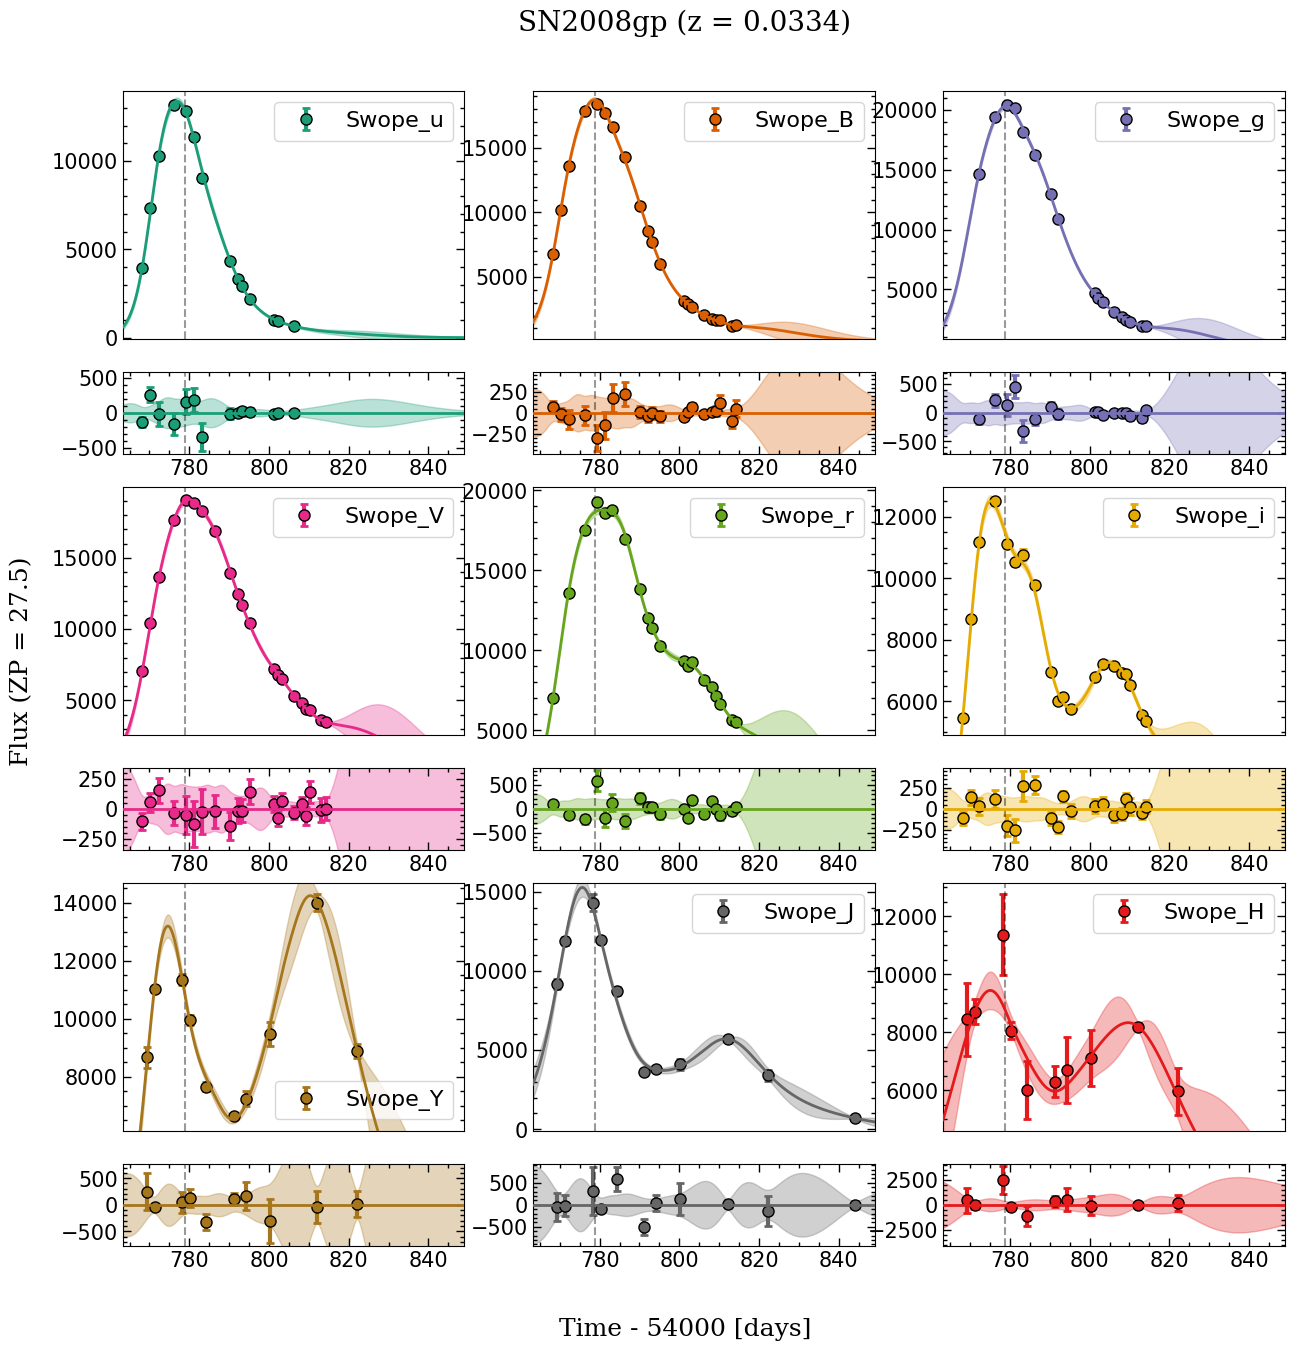

In [11]:
sn = piscola.call_sn('../../data/SN2008gp.dat')

sn.fit_lcs(fit_log=True)
sn.plot_fits()

<div class="alert alert-block alert-danger">
<b>Warning:</b> have in mind the possible drawbacks of fitting in logarithmic scale. Only do it if you are well aware of these!
</div>

Finally, the light-curve parameters obtained from the GP fits (without template) are stored in `sn.init_lc_parameters`:

In [12]:
sn.init_lc_parameters

{'tmax': 54778.851,
 'tmax_err': 0.353,
 'mmax': 16.438,
 'mmax_err': 0.011,
 'dm15': 1.042,
 'dm15_err': 0.016,
 'colour': -0.092,
 'colour_err': 0.016}

## SED templates

The SED template that PISCOLA uses can be changed using `sn.set_sed_template()`. By default, PISCOLA used the CSP template from [Lu et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023ApJ...948...27L/abstract):

In [13]:
sn.sed.comments

'Lu et al. (2023) Optical + NIR template built with BYOST (sBV=1.0)\nThe optical part is just the Hsiao template\n        \n'

To check all the available templates, use the following command:

In [14]:
piscola.show_available_templates()

List of available SED templates: ['91bg', 'csp', 'guy07', 'salt3', 'salt2', 'hsiao']


## Other features

### Observed parameters

There are a few functions that can help the user dependending on the needs. For instance, `sn.get_obs_params()` can be used to calcualte the time and magnitude of maximum for each band in observer frame (without any corrections):

In [15]:
sn.get_obs_params()

In [16]:
sn.obs_parameters

{'Swope_u': {'tmax': 54776.87,
  'tmax_err': 0.378,
  'mmax': 17.183,
  'mmax_err': 0.016},
 'Swope_B': {'tmax': 54778.732,
  'tmax_err': 0.364,
  'mmax': 16.818,
  'mmax_err': 0.012},
 'Swope_g': {'tmax': 54779.076,
  'tmax_err': 0.387,
  'mmax': 16.73,
  'mmax_err': 0.011},
 'Swope_V': {'tmax': 54779.86,
  'tmax_err': 0.535,
  'mmax': 16.797,
  'mmax_err': 0.011},
 'Swope_r': {'tmax': 54780.944,
  'tmax_err': 1.294,
  'mmax': 16.815,
  'mmax_err': 0.012},
 'Swope_i': {'tmax': 54775.216,
  'tmax_err': 0.346,
  'mmax': 17.257,
  'mmax_err': 0.016},
 'Swope_Y': {'tmax': 54774.608,
  'tmax_err': 0.297,
  'mmax': 17.199,
  'mmax_err': 0.033},
 'Swope_J': {'tmax': 54775.67,
  'tmax_err': 0.371,
  'mmax': 17.04,
  'mmax_err': 0.042},
 'Swope_H': {'tmax': 54774.562,
  'tmax_err': 2.323,
  'mmax': 17.562,
  'mmax_err': 0.075}}

The rest-frame light-curves, from the inital GP fits, can also be obtained, but first need to be computed:

In [17]:
sn.get_init_rest_lightcurves(['Swope_g'])  # calculates only for the given bands + Bessell_B (always)

In [18]:
sn.init_rest_lcs  # this is a 'Lightcurves' object

['Bessell_B' 'Swope_g']

Note that these light-curves are not computed by default to save computation time.

### GP model

The GP models are stored in `sn.init_gp_model` and `sn.gp_model`, and can be used to predict and any given time and wavelength using the `sn.init_gp_predict()` and `sn.gp_predict()` functions, respectively. Note that these can return the covariane matrix, if required.

<div class="alert alert-block alert-danger">
<b>Warning:</b> the GP models are trained in observer-frame, so if rest-frame light-curves are required, redshift correction needs to be considered.
</div>

In [20]:
sn.init_gp_model

GaussianProcess(
  num_data=144,
  dtype=dtype('float64'),
  kernel=Product(
    kernel1=Product(
      kernel1=Constant(value=f64[]),
      kernel2=Subspace(
        axis=0,
        kernel=Matern52(scale=f64[], distance=L1Distance())
      )
    ),
    kernel2=Subspace(
      axis=1,
      kernel=ExpSquared(scale=f64[], distance=L2Distance())
    )
  ),
  X=(f64[144](numpy), f64[144]),
  mean_function=Mean(value=f64[], func=None),
  mean=f64[144],
  noise=Diagonal(diag=f64[144]),
  solver=DirectSolver(
    X=(f64[144](numpy), f64[144]),
    variance_value=f64[144],
    covariance_value=f64[144,144],
    scale_tril=f64[144,144]
  )
)